In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
data = pd.read_csv('spam.csv')
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
data = data.rename(columns={"v1": "spam", "v2": "content"})

display(data)

,spam,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


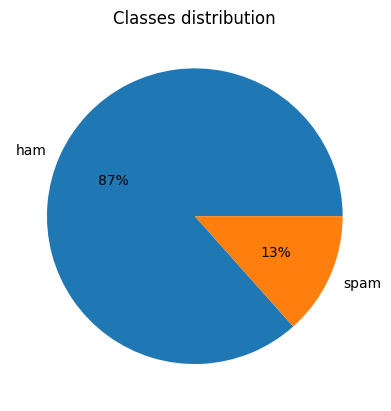

In [3]:
classes = pd.value_counts(data["spam"])

classes.plot(kind = 'pie',  autopct='%0.f%%') 
# про string formatting https://realpython.com/python-string-formatting/

plt.title("Classes distribution")

plt.ylabel('')

plt.show()

## EDA -- exploratory data analysis

Найдем частоты слов в сообщениях (отдельно для подкорпуса спама и не-спама). Для будущего алгоритма, слова будут признаками (features).

In [4]:
Counter(" ".join(data[data['spam']=='ham']["content"]).split()).most_common(50) 

[('to', 1530),
 ('you', 1458),
 ('I', 1436),
 ('the', 1019),
 ('a', 969),
 ('and', 738),
 ('i', 736),
 ('in', 734),
 ('u', 645),
 ('is', 638),
 ('my', 619),
 ('me', 537),
 ('of', 498),
 ('for', 475),
 ('that', 398),
 ('it', 375),
 ('your', 373),
 ('on', 352),
 ('have', 346),
 ('at', 333),
 ('not', 320),
 ('are', 319),
 ('be', 314),
 ('will', 291),
 ('2', 284),
 ('get', 281),
 ('can', 279),
 ("I'm", 278),
 ('&lt;#&gt;', 276),
 ('but', 275),
 ('so', 272),
 ('with', 248),
 ('do', 233),
 ('U', 229),
 ('when', 224),
 ('up', 222),
 ('.', 222),
 ('go', 219),
 ('if', 218),
 ('like', 209),
 ('we', 209),
 ('know', 202),
 ('got', 200),
 ('come', 197),
 ('all', 191),
 ('was', 191),
 ('call', 191),
 ('just', 189),
 ('or', 188),
 ('You', 186)]

In [5]:
# заберем все слова по условию, заджойним в строку, разобьем по пробелам, возьмем топ-20
count1 = Counter(" ".join(data[data['spam']=='ham']["content"]).lower().split()).most_common(20) 
df1 = pd.DataFrame.from_dict(count1) # новый дф
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})

# тот же набор операций для второго подкорпуса
count2 = Counter(" ".join(data[data['spam']=='spam']["content"]).lower().split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count"})

display(df1,df2)

,words in non-spam,count
0,i,2172
1,you,1665
2,to,1544
3,the,1113
4,a,1046
5,u,874
6,and,845
7,in,786
8,my,741
9,is,710


,words in spam,count
0,to,682
1,a,373
2,call,342
3,your,263
4,you,252
5,the,204
6,for,201
7,or,188
8,free,180
9,2,169


**Пример на маленькой матрице**

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['This is the first document.','Is this my the second document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
display(X.toarray())

['document' 'first' 'is' 'my' 'second' 'the' 'this']


array([[1, 1, 1, 0, 0, 1, 1],
       [1, 0, 1, 1, 1, 1, 1]])

Метод `.fit_transform()` выучивает обучающие данные и возвращает матрицу формата "документ-термин" для всего датасета

Сейчас у нас 8404 признака (по числу уникальных слов в корпусе). Новый признак j в ряду i равен 1 если слово j появляется в тексте i . В ином случае значение признака = 0

## Задание 1

Избавьтесь от стоп-слов. Используйте [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) из sklearn.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# your code here

In [10]:
vectorizer = CountVectorizer(stop_words = 'english')
type(vectorizer)

sklearn.feature_extraction.text.CountVectorizer

In [11]:
data

,spam,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
data["spam"] = data["spam"].map({'spam':1,'ham':0}) # в первой колонке переименуем значения 'spam' в 1  и 'ham' в 0

data

,spam,content
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [13]:
X = vectorizer.fit_transform(data["content"])
print(vectorizer.get_feature_names_out()[1000:1020]) # посмотрим на признаки,  например на 20 из них 

display(X.shape)
display(X.toarray())

['ak' 'aka' 'akon' 'al' 'alaikkum' 'alaipayuthe' 'albi' 'album' 'alcohol'
 'aldrine' 'alert' 'alertfrom' 'alerts' 'aletter' 'alex' 'alfie' 'algarve'
 'algebra' 'algorithms' 'ali']


(5572, 8357)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Задание 2

Разделите данные на обучающую и тестовую выборку при помощи функции [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) из sklearn

Нужно создать новые переменные:
- X_train - кусочек матрицы "документ/термин", который мы "отдадим" алгоритму для обучения
- X_test - кусочек матрицы "документ/термин", на котором будем проверять, как алгоритм сработал 
- y_train - кусочек датафрейма с текстами, который мы отдадим для обучения
- y_test -  кусочек датафрейма с текстами, на котором будем проверять, как алгоритм сработал 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, data['spam'], test_size=0.2, random_state=50)

print(X_train.shape, X_test.shape)
sum(y_train == 1)

(4457, 8357) (1115, 8357)


586

In [18]:
print(y_train.shape, y_test.shape) # размерности таргета (y)

(4457,) (1115,)


## Обучение наивного байесовского классификатора

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
bayes = MultinomialNB(alpha=0.330010) # используем лучшее значение alpha
bayes.fit(X_train, y_train) # тренируем модель

y_pred = bayes.predict(X_test) # предсказания модели здесь

#сделаем датафрейм с колонками для настоящего класса(это y_test) и для предсказанного (y_pred)

new_df = pd.DataFrame(data = y_test)
new_df["predicted"]=bayes.predict(X_test) # добавляем новую колонку с предсказаниями

new_df

,spam,predicted
3409,0,0
2103,0,0
2665,0,0
3239,0,0
1205,0,0
...,...,...
5020,0,0
2141,0,0
1265,0,0
4094,0,0


## Измерение метрик

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
m_confusion_test = confusion_matrix(y_test, y_pred)


pd.DataFrame(data = m_confusion_test, columns = ['Predicted ham', 'Predicted spam'],
            index = ['Actual ham', 'Actual spam'])

,Predicted ham,Predicted spam
Actual ham,943,11
Actual spam,9,152


In [36]:
bayes.score(X_test, y_test) #accuracy on testset

0.9820627802690582

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       954
           1       0.93      0.94      0.94       161

    accuracy                           0.98      1115
   macro avg       0.96      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



## Задание

Попробовать [другие классификаторы](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) и сравнить результаты